## Image Processesing

In [4]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image, ImageDraw
from skimage import filters, io, measure
from skimage.transform import resize
import glob

generated = 'C:/Users/christopher/Desktop/aws/images/gen.png'
original = '/Users/christopher/Desktop/aws/images/ori.png'
directory ='C:/Users/christopher/Desktop/aws/images/non_demented/720'
new_dir ='C:/Users/christopher/Desktop/aws/images/resized'

In [3]:
# Resize Images
filepaths = []

for dir_, _, files in os.walk(directory):
    for fileName in files:
        relDir = os.path.relpath(dir_, directory)
        relFile = os.path.join(relDir, fileName)
        filepaths.append(directory + "/" + relFile)

for i, fp in enumerate(filepaths):
    img = cv2.imread(fp) #/ 255.0
    img = resize(img, (720, 720*1.5))
    skimage.io.imsave(new_dir + "/" + str(i) + ".png", img)

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0

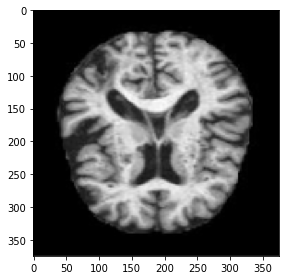

In [5]:
im_original = io.imread(original)
im_generated = io.imread(generated)

io.imshow(im_generated)
io.imshow(im_original)

In [ ]:
# Append list of image paths
filepaths = []

for dir_, _, files in os.walk(directory):
    for fileName in files:
        relDir = os.path.relpath(dir_, directory)
        relFile = os.path.join(relDir, fileName)
        filepaths.append(directory + "/" + relFile)

## GIF

In [17]:
from PIL import Image
import glob
 
# Create the frames
frames = []
imgs = glob.glob('C:/users/christopher/desktop/aws/images/non_demented/720/*.png')
for i in imgs:
    if 'lowres' not in i:
        new_frame = Image.open(i)
        frames.append(new_frame)

frames[0].save('png_to_gif.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)

### Color gradient

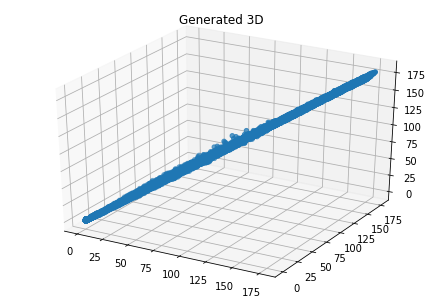

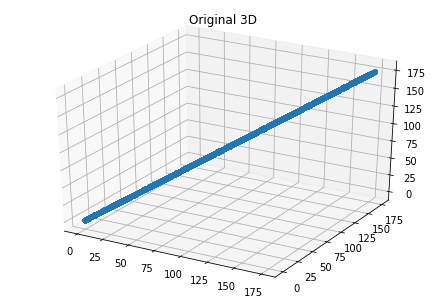

In [16]:
def three_dee(img_path, name):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    r,g,b = cv2.split(img)
    r = r.flatten()
    g = g.flatten()
    b = b.flatten()

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(r,g,b)
    plt.title(name)
    plt.show()
    return img

gen = three_dee(generated, 'Generated 3D ')
ori = three_dee(original, 'Original 3D')


### Canny Edge Detection

In [51]:
oz = 'C:/Users/christopher/Desktop/aws/images/original_zoomed.png'
gz = 'C:/Users/christopher/Desktop/aws/images/gen_zoomed.png'
im_oz = io.imread(oz)
im_gz = io.imread(gz)

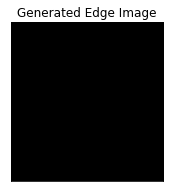

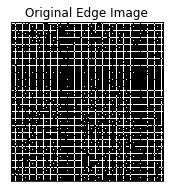

In [99]:
def edge_canny(img, threshold1, threshold2, is_gen=False):
    edges = cv2.Canny(img,threshold1,threshold2)
    plt.figure()
    if not is_gen:
#         plt.subplot(1,2,1),plt.imshow(img)
#         plt.title('Original Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
        plt.title('Original Edge Image'), plt.xticks([]), plt.yticks([])
    else:
#         plt.subplot(1,2,1),plt.imshow(img)
#         plt.title('Generated Image'), plt.xticks([]), plt.yticks([])
        plt.subplot(1,2,2),plt.imshow(edges,cmap = 'gray')
        plt.title('Generated Edge Image'), plt.xticks([]), plt.yticks([])    
    return plt.show()
    
edge_canny(im_gz, 25, 300, True)
edge_canny(im_oz, 25, 1, False)

### Segmentation

In [2]:
def kmeans(img_path, name, K):
    img = io.imread(img_path)

    z = img.reshape((-1,3))
    z = np.float32(z)    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    res = center[label.flatten()]
    res2 = res.reshape((img.shape))

    cv2.imshow(name,res2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return cv2.imshow(name, res2)


In [7]:
for i in range(1, 15):
    kmeans(generated, 'generated', i)

In [3]:
for i in range(1, 12):
    kmeans(original, 'original', i)

In [101]:
#from PIL import Image
import glob
def giffy(path, save_path):
    # Create the frames
    frames = []
    imgs = glob.glob(path)
    for i in imgs:
        if 'lowres' not in i:
            new_frame = Image.open(i)
            frames.append(new_frame)

    frames[0].save(save_path, format='GIF',
                   append_images=frames[1:],
                   save_all=True,
                   duration=300, loop=0)
path = 'C:/users/christopher/desktop/aws/images/edge/g/*.png'
save_path = 'C:/users/christopher/desktop/aws/images/edge/png_to_gif.gif'
giffy(path, save_path)